In [15]:
# packages
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd

In [16]:
data = open("D:/Github/MAT3533_hoc-ke_2023/Cancer_NB/NB_last/NB_last/datacum.txt",  'r')
data = data.readlines()
data = [x.split() for x in data if not x.startswith("#####")]
data = [x[0].split(",") for x in data if not len(x) == 0]
data = np.array(data).astype(int)
data_df = pd.DataFrame(data)
print(data_df)

          0   1   2   3   4   5   6   7   8   9   10
0    1000025   2   5   1   1   1   2   1   3   1   1
1    1002945   2   5   4   4   5   7  10   3   2   1
2    1015425   2   3   1   1   1   2   2   3   1   1
3    1016277   2   6   8   8   1   3   4   3   7   1
4    1017023   2   4   1   1   3   2   1   3   1   1
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
694   776715   2   3   1   1   1   3   2   1   1   1
695   841769   2   2   1   1   1   2   1   1   1   1
696   888820   4   5  10  10   3   7   3   8  10   2
697   897471   4   4   8   6   4   3   4  10   6   1
698   897471   4   4   8   8   5   4   5  10   4   1

[699 rows x 11 columns]


In [17]:
B_df = data_df.loc[data_df[1] == 2]
B_test_df = B_df[:80]
B_train_df = B_df[80:]

M_df = data_df.loc[data_df[1] == 4]
M_test_df = M_df[:40]
M_train_df = M_df[40:]

train_df = pd.concat([B_train_df, M_train_df])
test_df = pd.concat([B_test_df, M_test_df])
#print(test_df)
#print(train_df)

In [18]:
train_label = data_df[1]
train_data = data_df.drop(0, axis = 1)
train_data = train_data.drop(1, axis = 1)

In [19]:
test_id = test_df[0]
test_result = test_df[1]
test_result = np.array(test_result)
test_df = test_df.drop(0, axis=1)
test_df = test_df.drop(1, axis=1)

In [20]:
from sklearn.naive_bayes import GaussianNB

model_sk = GaussianNB()

In [21]:
model_sk.fit(train_data, train_label)

GaussianNB()

In [22]:
y_pred = model_sk.predict(test_df)

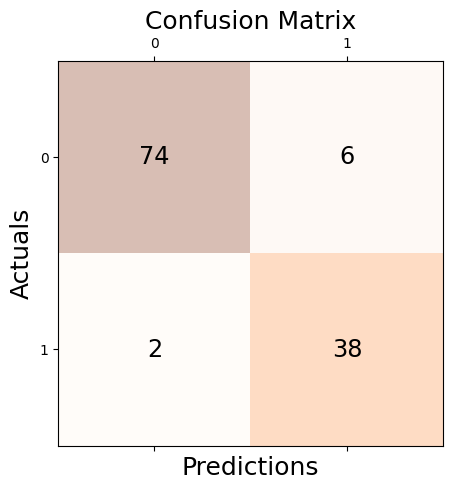

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=test_result, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [24]:
accuracy_score(test_result, y_pred)

0.9333333333333333

In [25]:
recall_score(test_result, y_pred, average=None)

array([0.925, 0.95 ])

In [26]:
precision_score(test_result, y_pred, average=None)

array([0.97368421, 0.86363636])